# Special Topics in Computer Science
## Midterm Exam - Part 1 (Morning)
### Prapatsorn Boontam ID:5988010 Section 2 

# Data dictionary (partial, just the ones that doesn't make much sense; info from Kaggle)
Block - partial address

Primary type - crime type

Description - a bit more detail of the crime

Location description - Description of where the crime occurred in that block

Arrest - Are there an arrest

Domestic - Is it a domestic violence

Beat - smallest police area

District - Police district code

Community area - self-explanatory

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [75]:
crime1 = pd.read_csv('../cs-midterms/crime2017.csv')
crime1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00


In [4]:
crime2 = pd.read_csv('../cs-midterms/crime2018.csv')

In [5]:
crime2.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on
0,2018-06-28 07:02:00+00:00,106XX S LAFAYETTE AVE,HOMICIDE,FIRST DEGREE MURDER,HOUSE,512,5,True,NaN,False,49.0,2019-03-08 16:21:48+00:00
1,2018-03-22 20:03:00+00:00,105XX S WENTWORTH AVE,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,APARTMENT,512,5,False,"(41.703230009, -87.628173505)",False,49.0,2018-05-04 15:51:04+00:00
2,2018-07-25 19:30:00+00:00,104XX S CORLISS AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5,False,"(41.7050135, -87.603940179)",False,50.0,2018-08-01 15:55:43+00:00
3,2018-09-25 19:00:00+00:00,103XX S MICHIGAN AVE,ROBBERY,ARMED: HANDGUN,SIDEWALK,512,5,False,"(41.706987456, -87.620244029)",False,49.0,2018-10-05 15:54:07+00:00
4,2018-06-22 14:50:00+00:00,103XX S CORLISS AVE,ROBBERY,STRONGARM - NO WEAPON,GAS STATION,512,5,False,"(41.706320053, -87.603980344)",True,50.0,2018-06-29 15:54:08+00:00


We would need to encode pretty much every column because it's all in text

In [76]:
crime1.isnull().sum()

date                       0
block                      0
primary_type               0
description                0
location_description    1043
beat                       0
district                   1
arrest                     0
location                3734
domestic                   0
community_area             0
updated_on                 0
dtype: int64

In [7]:
crime2.isnull().sum()

date                       0
block                      0
primary_type               0
description                0
location_description     774
beat                       0
district                   0
arrest                     0
location                2935
domestic                   0
community_area             2
updated_on                 0
dtype: int64

# Encode festival

In [77]:
lb_make = LabelEncoder()
crime1['block_code'] = lb_make.fit_transform(crime1['block'])

In [78]:
crime1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232


In [79]:
crime1.describe()

,beat,district,community_area,block_code
count,268045.000000,268044.000000,268045.000000,268045.000000
mean,1145.508754,11.226030,36.550146,13136.322509
std,699.693860,6.988427,21.407095,8376.976448
min,111.000000,1.000000,0.000000,0.000000
25%,611.000000,6.000000,23.000000,5412.000000
50%,1031.000000,10.000000,32.000000,13065.000000
75%,1722.000000,17.000000,53.000000,20929.000000
max,2535.000000,31.000000,77.000000,27829.000000


In [80]:
lb_make = LabelEncoder()
crime1['crimetype_code'] = lb_make.fit_transform(crime1['primary_type'])

In [81]:
crime1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499,27
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516,27
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383,27
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549,27
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232,27


In [82]:
lb_make = LabelEncoder()
crime1['desc_code'] = lb_make.fit_transform(crime1['description'])

In [83]:
crime1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499,27,42
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516,27,42
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383,27,42
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549,27,42
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232,27,42


In [84]:
lb_make = LabelEncoder()
crime1['dom'] = lb_make.fit_transform(crime1['domestic'])

In [85]:
crime1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499,27,42,0
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516,27,42,0
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383,27,42,0
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549,27,42,0
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232,27,42,0


In [86]:
lb_make = LabelEncoder()
crime1['arr'] = lb_make.fit_transform(crime1['arrest'])
crime1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499,27,42,0,0
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516,27,42,0,0
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383,27,42,0,0
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549,27,42,0,0
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232,27,42,0,0


In [87]:
lb_make = LabelEncoder()
crime1['locdes'] = lb_make.fit_transform(crime1['location_description'])

TypeError: '<' not supported between instances of 'float' and 'str'

It bombed. So I might have to drop this later, didn't look like this column would be very helpful anyway (except it might probably is)

In [88]:
crime1.describe()

,beat,district,community_area,block_code,crimetype_code,desc_code,dom,arr
count,268045.000000,268044.000000,268045.000000,268045.000000,268045.000000,268045.000000,268045.000000,268045.000000
mean,1145.508754,11.226030,36.550146,13136.322509,14.484381,162.869943,0.159007,0.195221
std,699.693860,6.988427,21.407095,8376.976448,11.750334,96.743161,0.365683,0.396371
min,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,611.000000,6.000000,23.000000,5412.000000,2.000000,92.000000,0.000000,0.000000
50%,1031.000000,10.000000,32.000000,13065.000000,8.000000,167.000000,0.000000,0.000000
75%,1722.000000,17.000000,53.000000,20929.000000,30.000000,254.000000,0.000000,0.000000
max,2535.000000,31.000000,77.000000,27829.000000,31.000000,309.000000,1.000000,1.000000


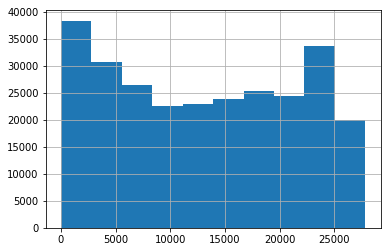

In [89]:
crime1.block_code.hist()
plt.show()

So many districts, there aren't a crime/district, right?

In [90]:
crime1[(crime1.block_code==1)]

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
37928,2017-05-16 23:40:00+00:00,0000X E 100TH ST,ASSAULT,SIMPLE,RESIDENCE,511,5.0,False,"(41.71265356, -87.621866175)",False,49,2018-02-10 15:50:01+00:00,1,1,254,0,0
38033,2017-09-03 23:00:00+00:00,0000X E 100TH ST,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,511,5.0,False,"(41.712643557, -87.622466942)",False,49,2018-02-10 15:50:01+00:00,1,6,276,0,0
38056,2017-04-26 13:00:00+00:00,0000X E 100TH ST,CRIMINAL DAMAGE,TO VEHICLE,DRIVEWAY - RESIDENTIAL,511,5.0,False,"(41.712653356, -87.621833214)",False,49,2018-02-10 15:50:01+00:00,1,6,280,0,0
38078,2017-05-28 03:12:00+00:00,0000X E 100TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,511,5.0,True,"(41.712655533, -87.621741627)",False,49,2018-02-10 15:50:01+00:00,1,31,287,0,1
38098,2017-12-29 00:00:00+00:00,0000X E 100TH ST,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,511,5.0,False,"(41.712643557, -87.622466942)",True,49,2018-05-04 15:51:04+00:00,1,23,263,1,0
75951,2017-01-08 12:48:00+00:00,0000X E 100TH ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,511,5.0,False,"(41.712655307, -87.621705004)",True,49,2017-02-14 15:49:42+00:00,1,2,106,1,0
76151,2017-07-30 16:28:00+00:00,0000X E 100TH ST,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,511,5.0,False,"(41.712655533, -87.621741627)",True,49,2018-02-10 15:50:01+00:00,1,23,138,1,0
114334,2017-06-22 16:45:00+00:00,0000X E 100TH ST,ASSAULT,AGGRAVATED: HANDGUN,RESIDENTIAL YARD (FRONT/BACK),511,5.0,False,"(41.712645689, -87.62236803)",False,49,2018-02-10 15:50:01+00:00,1,1,30,0,0
114338,2017-05-15 10:00:00+00:00,0000X E 100TH ST,ASSAULT,SIMPLE,SIDEWALK,511,5.0,False,"(41.71265356, -87.621866175)",False,49,2018-02-10 15:50:01+00:00,1,1,254,0,0
114486,2017-04-16 08:40:00+00:00,0000X E 100TH ST,CRIMINAL DAMAGE,TO VEHICLE,STREET,511,5.0,False,"(41.7126539, -87.621921109)",False,49,2018-02-10 15:50:01+00:00,1,6,280,0,0


Okay, it didn't

In [91]:
crime1[(crime1.crimetype_code==2)]

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
10,2017-06-07 21:00:00+00:00,105XX S WENTWORTH AVE,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,512,5.0,False,"(41.703230009, -87.628173505)",False,49,2018-02-10 15:50:01+00:00,26554,2,30,0,0
11,2017-06-21 14:34:00+00:00,003XX W 106TH PL,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,512,5.0,False,"(41.700684498, -87.631511638)",False,49,2018-02-10 15:50:01+00:00,1670,2,30,0,0
12,2017-07-09 02:56:00+00:00,105XX S EBERHART AVE,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,512,5.0,False,"(41.703242699, -87.611214622)",False,49,2018-02-10 15:50:01+00:00,26498,2,35,0,0
13,2017-07-30 04:45:00+00:00,103XX S WENTWORTH AVE,BATTERY,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),512,5.0,True,"(41.706875037, -87.628265515)",False,49,2018-02-10 15:50:01+00:00,26392,2,254,0,1
14,2017-09-07 22:00:00+00:00,106XX S STATE ST,BATTERY,SIMPLE,RESIDENCE,512,5.0,False,"(41.700425673, -87.623330227)",False,49,2018-02-10 15:50:01+00:00,26630,2,254,0,0
15,2017-04-14 17:45:00+00:00,009XX E 104TH ST,BATTERY,SIMPLE,APARTMENT,512,5.0,False,"(41.705677782, -87.600944364)",False,50,2018-02-10 15:50:01+00:00,3833,2,254,0,0
16,2017-10-27 01:55:00+00:00,002XX W 106TH PL,BATTERY,SIMPLE,RESIDENCE,512,5.0,False,"(41.700717133, -87.62877221)",False,49,2018-02-10 15:50:01+00:00,1232,2,254,0,0
17,2017-03-24 13:15:00+00:00,103XX S DR MARTIN LUTHER KING JR DR,BATTERY,SIMPLE,STREET,512,5.0,False,"(41.706859194, -87.613756011)",True,49,2018-02-10 15:50:01+00:00,26346,2,254,1,0
18,2017-05-04 15:15:00+00:00,103XX S CORLISS AVE,BATTERY,SIMPLE,SIDEWALK,512,5.0,True,"(41.706918435, -87.603999216)",False,50,2018-02-10 15:50:01+00:00,26341,2,254,0,1
19,2017-12-02 09:00:00+00:00,104XX S WABASH AVE,BATTERY,SIMPLE,RESIDENCE,512,5.0,False,"(41.704582216, -87.622262779)",False,49,2018-02-10 15:50:01+00:00,26467,2,254,0,0


Almost 50,000 crimes are of battery type, wow

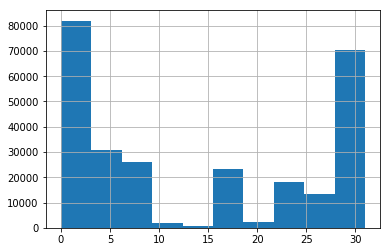

In [92]:
crime1.crimetype_code.hist()
plt.show()

Very high distribution in the very firsts and lasts of the crime types. Those can make up for more than half. ~80,000+70,000 = 150,000 / 268,000 = ~56%. So, the area where those crimes are happening probably should be avoided

In [93]:
crime1[(crime1.crimetype_code==1)]

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
57,2017-05-19 22:00:00+00:00,007XX E 104TH PL,ASSAULT,AGGRAVATED: HANDGUN,RESIDENTIAL YARD (FRONT/BACK),512,5.0,False,"(41.704694791, -87.605613693)",False,50,2018-02-10 15:50:01+00:00,3007,1,30,0,0
58,2017-09-21 13:00:00+00:00,002XX W 107TH ST,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,VACANT LOT/LAND,512,5.0,False,"(41.699800538, -87.629221633)",False,49,2018-02-10 15:50:01+00:00,1235,1,35,0,0
59,2017-03-01 22:24:00+00:00,105XX S WENTWORTH AVE,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,STREET,512,5.0,True,"(41.703230009, -87.628173505)",True,49,2018-02-10 15:50:01+00:00,26554,1,33,1,1
60,2017-07-15 00:20:00+00:00,106XX S EDBROOKE AVE,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE,512,5.0,True,"(41.700817266, -87.619649405)",False,49,2018-02-10 15:50:01+00:00,26588,1,33,0,1
61,2017-02-24 10:10:00+00:00,008XX E 103RD ST,ASSAULT,PRO EMP HANDS NO/MIN INJURY,"SCHOOL, PUBLIC, BUILDING",512,5.0,True,"(41.707519433, -87.601839023)",False,50,2018-02-10 15:50:01+00:00,3414,1,232,0,1
62,2017-03-24 09:39:00+00:00,008XX E 103RD ST,ASSAULT,AGG PO HANDS NO/MIN INJURY,"SCHOOL, PUBLIC, BUILDING",512,5.0,True,"(41.707519433, -87.601839023)",False,50,2018-02-10 15:50:01+00:00,3414,1,5,0,1
63,2017-06-20 02:00:00+00:00,007XX E 104TH PL,ASSAULT,SIMPLE,RESIDENCE,512,5.0,False,"(41.704695, -87.605646649)",False,50,2018-02-10 15:50:01+00:00,3007,1,254,0,0
64,2017-11-27 15:00:00+00:00,002XX W 104TH ST,ASSAULT,SIMPLE,"SCHOOL, PRIVATE, BUILDING",512,5.0,False,"(41.705267858, -87.629323117)",False,49,2018-02-10 15:50:01+00:00,1229,1,254,0,0
65,2017-03-22 08:30:00+00:00,002XX W 104TH ST,ASSAULT,SIMPLE,"SCHOOL, PUBLIC, BUILDING",512,5.0,False,"(41.705267858, -87.629323117)",False,49,2018-02-10 15:50:01+00:00,1229,1,254,0,0
66,2017-06-20 10:45:00+00:00,103XX S COTTAGE GROVE AVE,ASSAULT,SIMPLE,STREET,512,5.0,False,"(41.707203646, -87.606566877)",False,50,2018-02-10 15:50:01+00:00,26342,1,254,0,0


In [94]:
crime1[(crime1.crimetype_code==3)]

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
77,2017-12-16 15:30:00+00:00,103XX S WOODLAWN AVE,BURGLARY,FORCIBLE ENTRY,OTHER,512,5.0,False,"(41.706853644, -87.594287773)",False,50,2018-05-04 15:51:04+00:00,26395,3,122,0,0
78,2017-02-20 00:00:00+00:00,003XX W 107TH ST,BURGLARY,FORCIBLE ENTRY,RESIDENCE,512,5.0,False,"(41.699771413, -87.631638744)",False,49,2018-02-10 15:50:01+00:00,1673,3,122,0,0
79,2017-07-13 18:00:00+00:00,105XX S CALUMET AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,512,5.0,False,"(41.703153118, -87.614873962)",False,49,2018-02-10 15:50:01+00:00,26489,3,122,0,0
80,2017-11-27 08:59:00+00:00,006XX E 103RD PL,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,512,5.0,True,"(41.706484881, -87.608343809)",False,49,2018-02-10 15:50:01+00:00,2623,3,284,0,1
81,2017-07-18 21:00:00+00:00,104XX S EBERHART AVE,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,512,5.0,False,"(41.704919778, -87.611261774)",False,49,2018-02-10 15:50:01+00:00,26424,3,284,0,0
82,2017-04-06 15:30:00+00:00,0000X E 105TH ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,512,5.0,False,"(41.703473512, -87.622707113)",False,49,2018-02-10 15:50:01+00:00,9,3,284,0,0
83,2017-09-18 19:17:00+00:00,009XX E 103RD ST,BURGLARY,UNLAWFUL ENTRY,"SCHOOL, PUBLIC, BUILDING",512,5.0,False,"(41.707535018, -87.600839053)",False,50,2018-02-10 15:50:01+00:00,3832,3,284,0,0
252,2017-03-23 20:50:00+00:00,023XX S DRAKE AVE,BURGLARY,FORCIBLE ENTRY,VACANT LOT/LAND,1024,10.0,False,"(41.849017087, -87.713704239)",False,30,2018-02-10 15:50:01+00:00,9376,3,122,0,0
253,2017-03-21 14:00:00+00:00,019XX S ST LOUIS AVE,BURGLARY,FORCIBLE ENTRY,APARTMENT,1024,10.0,False,"(41.854564542, -87.712421035)",False,29,2018-02-10 15:50:01+00:00,7948,3,122,0,0
254,2017-03-14 10:00:00+00:00,019XX S CHRISTIANA AVE,BURGLARY,FORCIBLE ENTRY,APARTMENT,1024,10.0,False,"(41.854845106, -87.708997276)",False,29,2018-02-10 15:50:01+00:00,7906,3,122,0,0


So, crime types 1-2-3 (assault-battery-burglary) make up for approx. 30% of all crimes. Now, I'm going to check out the other end of the histogram

In [95]:
crime1[(crime1.crimetype_code==27)]

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499,27,42,0,0
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516,27,42,0,0
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383,27,42,0,0
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549,27,42,0,0
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232,27,42,0,0
5,2017-11-01 10:45:00+00:00,105XX S MICHIGAN AVE,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.7030247, -87.620694297)",False,49,2018-02-10 15:50:01+00:00,26525,27,42,0,0
6,2017-07-05 17:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: OTHER FIREARM,RESIDENCE,512,5.0,False,"(41.700708236, -87.629559608)",False,49,2018-02-10 15:50:01+00:00,1232,27,44,0,0
7,2017-02-15 22:05:00+00:00,0000X W 104TH PL,ROBBERY,ARMED: OTHER FIREARM,STREET,512,5.0,False,"(41.704421486, -87.624231083)",False,49,2017-02-22 15:53:51+00:00,340,27,44,0,0
8,2017-05-20 23:30:00+00:00,103XX S MICHIGAN AVE,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,512,5.0,False,"(41.706663944, -87.620295213)",False,49,2018-02-10 15:50:01+00:00,26368,27,261,0,0
9,2017-11-04 13:30:00+00:00,103XX S CORLISS AVE,ROBBERY,STRONGARM - NO WEAPON,RESIDENTIAL YARD (FRONT/BACK),512,5.0,False,"(41.706951365, -87.603998844)",False,50,2018-02-10 15:50:01+00:00,26341,27,261,0,0


In [96]:
crime1[(crime1.crimetype_code==30)]

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
84,2017-09-05 08:00:00+00:00,008XX E 103RD ST,THEFT,OVER $500,"SCHOOL, PUBLIC, BUILDING",512,5.0,False,"(41.707519433, -87.601839023)",False,50,2018-02-10 15:50:01+00:00,3414,30,203,0,0
85,2017-12-07 04:00:00+00:00,103XX S MICHIGAN AVE,THEFT,OVER $500,STREET,512,5.0,False,"(41.705934685, -87.620413136)",False,49,2018-02-10 15:50:01+00:00,26368,30,203,0,0
86,2017-02-02 19:00:00+00:00,105XX S CALUMET AVE,THEFT,OVER $500,RESIDENCE-GARAGE,512,5.0,False,"(41.702760615, -87.614863683)",False,49,2017-02-14 15:49:42+00:00,26489,30,203,0,0
87,2017-01-01 23:30:00+00:00,103XX S CALUMET AVE,THEFT,OVER $500,STREET,512,5.0,False,"(41.706614318, -87.614970928)",False,49,2017-02-14 15:49:42+00:00,26334,30,203,0,0
88,2017-08-20 23:00:00+00:00,105XX S INDIANA AVE,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),512,5.0,False,"(41.70305791, -87.618529692)",False,49,2018-02-10 15:50:01+00:00,26513,30,0,0,0
89,2017-06-22 14:30:00+00:00,105XX S INDIANA AVE,THEFT,$500 AND UNDER,APARTMENT,512,5.0,False,"(41.702975563, -87.618526942)",True,49,2018-02-10 15:50:01+00:00,26513,30,0,1,0
90,2017-08-26 14:30:00+00:00,103XX S EBERHART AVE,THEFT,$500 AND UNDER,SIDEWALK,512,5.0,False,"(41.706709388, -87.611311331)",False,49,2018-02-10 15:50:01+00:00,26348,30,0,0,0
91,2017-01-10 11:00:00+00:00,0000X W 103RD ST,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),512,5.0,False,"(41.707139627, -87.625325518)",False,49,2018-02-10 15:50:01+00:00,339,30,0,0,0
92,2017-08-19 20:00:00+00:00,105XX S STATE ST,THEFT,$500 AND UNDER,STREET,512,5.0,False,"(41.702599552, -87.623390538)",False,49,2018-02-10 15:50:01+00:00,26543,30,0,0,0
93,2017-05-30 10:00:00+00:00,103XX S VERNON AVE,THEFT,$500 AND UNDER,STREET,512,5.0,False,"(41.706653929, -87.612531464)",False,49,2018-02-10 15:50:01+00:00,26387,30,0,0,0


In [97]:
crime1[(crime1.crimetype_code==31)]

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
154,2017-04-25 13:11:00+00:00,106XX S CHAMPLAIN AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,512,5.0,True,"(41.701193329, -87.607396231)",False,50,2018-02-10 15:50:01+00:00,26578,31,287,0,1
155,2017-12-11 00:08:00+00:00,105XX S LA SALLE ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,512,5.0,True,"(41.702421185, -87.626955586)",False,49,2018-02-10 15:50:01+00:00,26516,31,287,0,1
156,2017-10-14 19:18:00+00:00,103XX S DR MARTIN LUTHER KING JR DR,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,BARBERSHOP,512,5.0,True,"(41.706820777, -87.613756439)",False,49,2018-02-10 15:50:01+00:00,26346,31,287,0,1
157,2017-11-20 15:43:00+00:00,106XX S CHAMPLAIN AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,512,5.0,True,"(41.700949032, -87.607387993)",False,50,2018-02-10 15:50:01+00:00,26578,31,287,0,1
158,2017-05-11 12:57:00+00:00,103XX S RHODES AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,512,5.0,True,"(41.706946017, -87.610100153)",False,49,2018-02-10 15:50:01+00:00,26378,31,287,0,1
322,2017-06-26 19:34:00+00:00,035XX W 24TH ST,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,STREET,1024,10.0,True,"(41.848041803, -87.714014612)",False,30,2018-02-10 15:50:01+00:00,13555,31,295,0,1
323,2017-08-11 23:50:00+00:00,023XX S HOMAN AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,1024,10.0,False,"(41.849065911, -87.710048131)",False,30,2018-02-10 15:50:01+00:00,9379,31,287,0,0
324,2017-12-23 00:24:00+00:00,025XX S SPAULDING AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),1024,10.0,True,"(41.845638238, -87.707508645)",False,30,2018-05-04 15:51:04+00:00,10125,31,287,0,1
325,2017-08-08 12:23:00+00:00,022XX S KEDZIE AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,1024,10.0,True,"(41.850886529, -87.705225874)",False,30,2018-02-10 15:50:01+00:00,9039,31,287,0,1
326,2017-06-28 14:54:00+00:00,024XX S ST LOUIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,1024,10.0,False,"(41.847489927, -87.712438066)",False,30,2018-02-10 15:50:01+00:00,9760,31,287,0,0


And crime types 27-30-31 (robbery-theft-weapons violation) make up for about 28% of all crimes. So, combined with the first couple of types (assault-battery-burglary), the areas that have these kinds of crimes should all be avoided

So, what am I going to do is try to get blocks info and maybe police district and community area that is in crime type 1-2-3-27-30-31 so that I can find out which area people should avoid. Which would in turn 'answer' which area people should live.

# Side-note
From my experience from being in Chicago, the downtown is fantastic. The area in which there are crimes are from, like, 40th Street and down. Which is probably more than half of Chicago because the Red line terminates at 95th street. So in my opinion, people should live in downtown and we'll find out if that's actually the case.

In [98]:
hi=crime1[(crime1.crimetype_code>=27)]
lo=crime1[(crime1.crimetype_code<=3)]
tmp=[hi,lo]
crime1_1=pd.concat(tmp)
crime1_1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499,27,42,0,0
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516,27,42,0,0
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383,27,42,0,0
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549,27,42,0,0
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232,27,42,0,0


In [99]:
crime1_1

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499,27,42,0,0
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516,27,42,0,0
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383,27,42,0,0
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549,27,42,0,0
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232,27,42,0,0
5,2017-11-01 10:45:00+00:00,105XX S MICHIGAN AVE,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.7030247, -87.620694297)",False,49,2018-02-10 15:50:01+00:00,26525,27,42,0,0
6,2017-07-05 17:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: OTHER FIREARM,RESIDENCE,512,5.0,False,"(41.700708236, -87.629559608)",False,49,2018-02-10 15:50:01+00:00,1232,27,44,0,0
7,2017-02-15 22:05:00+00:00,0000X W 104TH PL,ROBBERY,ARMED: OTHER FIREARM,STREET,512,5.0,False,"(41.704421486, -87.624231083)",False,49,2017-02-22 15:53:51+00:00,340,27,44,0,0
8,2017-05-20 23:30:00+00:00,103XX S MICHIGAN AVE,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,512,5.0,False,"(41.706663944, -87.620295213)",False,49,2018-02-10 15:50:01+00:00,26368,27,261,0,0
9,2017-11-04 13:30:00+00:00,103XX S CORLISS AVE,ROBBERY,STRONGARM - NO WEAPON,RESIDENTIAL YARD (FRONT/BACK),512,5.0,False,"(41.706951365, -87.603998844)",False,50,2018-02-10 15:50:01+00:00,26341,27,261,0,0


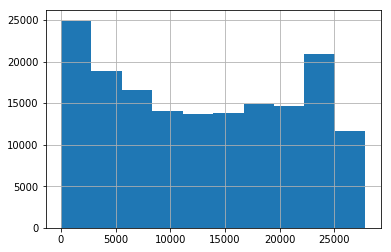

In [100]:
crime1_1.block_code.hist()
plt.show()

Hmm, the 'middle' part between block code 10,000-15,000 looks pretty alright, also after 25,000.

To see the other side of the spectrum, the middle part where about 40% of the crimes are happening, where should you live in Chicago.

In [101]:
crime1_2 = crime1[(crime1.crimetype_code<=26)&(crime1.crimetype_code>=4)].copy()
crime1_2.describe()

,beat,district,community_area,block_code,crimetype_code,desc_code,dom,arr
count,103968.000000,103968.000000,103968.000000,103968.000000,103968.000000,103968.000000,103968.000000,103968.000000
mean,1156.831708,11.338672,37.121489,13440.928997,12.459641,194.776056,0.105619,0.258512
std,689.508806,6.888513,21.367117,8283.141138,6.752278,82.885780,0.307351,0.437819
min,111.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000
25%,614.000000,6.000000,23.000000,5788.000000,6.000000,118.000000,0.000000,0.000000
50%,1032.000000,10.000000,31.000000,13647.000000,8.000000,217.000000,0.000000,0.000000
75%,1711.000000,17.000000,55.000000,20952.000000,17.000000,276.000000,0.000000,1.000000
max,2535.000000,31.000000,77.000000,27829.000000,26.000000,309.000000,1.000000,1.000000


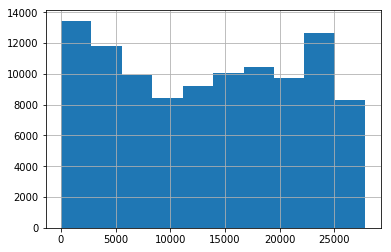

In [102]:
crime1_2.block_code.hist()
plt.show()

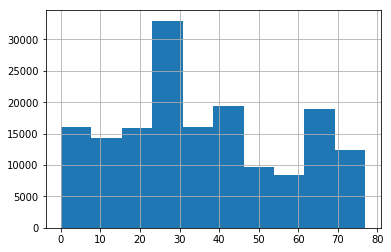

In [103]:
crime1_1.community_area.hist()
plt.show()

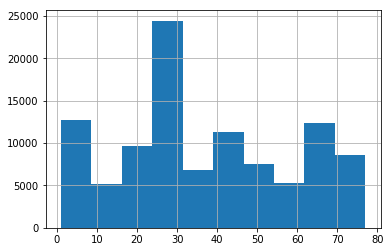

In [104]:
crime1_2.community_area.hist()
plt.show()

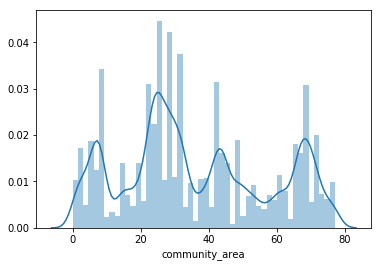

In [105]:
sb.distplot(crime1_1.community_area)
plt.show()

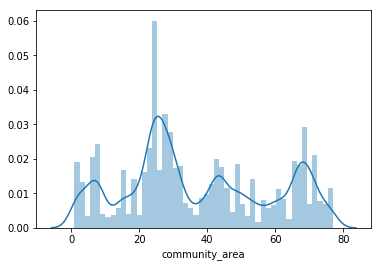

In [106]:
sb.distplot(crime1_2.community_area)
plt.show()

In terms of community areas, you just shouldn't live at community areas ~24-34.

# Answer to Question 1

Where you should live in Chicago if you want the least amount of crimes?

You should live in areas of block codes ~8,000-11,000 and 25,000 and over.

In terms of community areas, I did drew a scatterplot to see the correlation between block codes and community areas and it made no sense at all. So, I can't use community areas as an answer.

# Start for Question 2

I need to convert date column into datetime because from my assumption, date is imported as just strings.

In [107]:
crime1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00,26499,27,42,0,0
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00,26516,27,42,0,0
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00,26383,27,42,0,0
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00,26549,27,42,0,0
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00,1232,27,42,0,0


In [108]:
crime1.date

0         2017-12-02 19:15:00+00:00
1         2017-07-08 22:00:00+00:00
2         2017-06-22 21:00:00+00:00
3         2017-09-30 09:00:00+00:00
4         2017-10-01 22:15:00+00:00
5         2017-11-01 10:45:00+00:00
6         2017-07-05 17:15:00+00:00
7         2017-02-15 22:05:00+00:00
8         2017-05-20 23:30:00+00:00
9         2017-11-04 13:30:00+00:00
10        2017-06-07 21:00:00+00:00
11        2017-06-21 14:34:00+00:00
12        2017-07-09 02:56:00+00:00
13        2017-07-30 04:45:00+00:00
14        2017-09-07 22:00:00+00:00
15        2017-04-14 17:45:00+00:00
16        2017-10-27 01:55:00+00:00
17        2017-03-24 13:15:00+00:00
18        2017-05-04 15:15:00+00:00
19        2017-12-02 09:00:00+00:00
20        2017-05-10 11:30:00+00:00
21        2017-01-19 14:45:00+00:00
22        2017-01-23 13:15:00+00:00
23        2017-04-01 18:33:00+00:00
24        2017-05-20 23:26:00+00:00
25        2017-11-15 11:55:00+00:00
26        2017-09-10 10:45:00+00:00
27        2017-03-27 01:47:0

In [109]:
pd.to_datetime('2017-02-01 13:00:00+00:00')

Timestamp('2017-02-01 13:00:00+0000', tz='UTC')

In [110]:
crime1_1['datetime']= pd.to_datetime(crime1_1.date)

In [111]:
crime1_1.datetime.dtype

datetime64[ns, UTC]

In [112]:
crime1_1['year'] = crime1_1['datetime'].dt.year 
crime1_1['month'] = crime1_1['datetime'].dt.month 
crime1_1['day'] = crime1_1['datetime'].dt.day 

In [113]:
crime1_1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,...,updated_on,block_code,crimetype_code,desc_code,dom,arr,datetime,year,month,day
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,...,2018-02-10 15:50:01+00:00,26499,27,42,0,0,2017-12-02 19:15:00+00:00,2017,12,2
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,...,2018-02-10 15:50:01+00:00,26516,27,42,0,0,2017-07-08 22:00:00+00:00,2017,7,8
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,...,2018-02-10 15:50:01+00:00,26383,27,42,0,0,2017-06-22 21:00:00+00:00,2017,6,22
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,...,2018-02-10 15:50:01+00:00,26549,27,42,0,0,2017-09-30 09:00:00+00:00,2017,9,30
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,...,2018-02-10 15:50:01+00:00,1232,27,42,0,0,2017-10-01 22:15:00+00:00,2017,10,1


In [114]:
crime1_2['datetime']= pd.to_datetime(crime1_2.date)
crime1_2['year'] = crime1_2['datetime'].dt.year 
crime1_2['month'] = crime1_2['datetime'].dt.month 
crime1_2['day'] = crime1_2['datetime'].dt.day 
crime1_2.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,...,updated_on,block_code,crimetype_code,desc_code,dom,arr,datetime,year,month,day
23,2017-04-01 18:33:00+00:00,006XX E 105TH ST,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,ALLEY,512,5.0,True,"(41.703764292, -87.606887586)",False,...,2018-02-10 15:50:01+00:00,2627,26,238,0,1,2017-04-01 18:33:00+00:00,2017,4,1
24,2017-05-20 23:26:00+00:00,105XX S CORLISS AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,ALLEY,512,5.0,True,"(41.703333676, -87.603893248)",False,...,2018-02-10 15:50:01+00:00,26494,26,238,0,1,2017-05-20 23:26:00+00:00,2017,5,20
106,2017-10-05 17:00:00+00:00,105XX S WENTWORTH AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,512,5.0,False,"(41.70230503, -87.628150654)",False,...,2018-02-10 15:50:01+00:00,26554,16,70,0,0,2017-10-05 17:00:00+00:00,2017,10,5
107,2017-04-26 12:00:00+00:00,0000X W 103RD ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,512,5.0,False,"(41.707138259, -87.625548929)",False,...,2018-02-10 15:50:01+00:00,339,16,70,0,0,2017-04-26 12:00:00+00:00,2017,4,26
108,2017-07-16 22:00:00+00:00,106XX S CHAMPLAIN AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,RESIDENCE,512,5.0,False,"(41.701437603, -87.607400808)",False,...,2018-02-10 15:50:01+00:00,26578,16,70,0,0,2017-07-16 22:00:00+00:00,2017,7,16


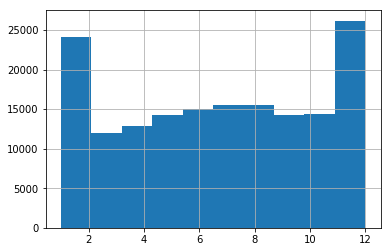

In [115]:
crime1_1.month.hist()
plt.show()

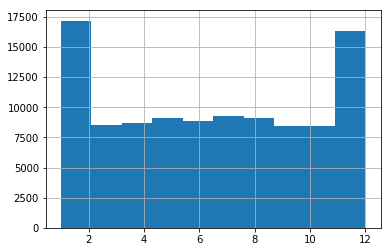

In [116]:
crime1_2.month.hist()
plt.show()

So, November-December and January-February has the highest spikes of crimes, as expected. For both the 60% and 40% of crimes, too.

In [117]:
crime1_1.block_code[(crime1_1.month==4)]

154       26578
200        9757
263        8696
327        7948
329        8660
381       26929
466          13
478       26820
480       26820
486       26820
492       26820
705       12539
757       11189
759       11206
852       11261
855       11919
864       11230
913       12262
914        9418
1024      27370
1082      27435
1176      10449
1179      10892
1200      10156
1202      10219
1272      27469
1343      27550
1351      27614
1357      27538
1501      27340
          ...  
267148    13639
267157     6737
267309    17872
267313    17324
267333    17358
267335    17944
267347     1194
267354    18220
267355    17345
267370    17617
267541    12585
267574     5112
267578    11376
267582    11251
267588    11645
267717    26287
267720    25900
267727     3831
267737    26242
267744    26164
267755    26250
267756    26287
267775    26166
267781    25848
267948     9856
267958    11252
267966    11252
267967     7548
267972     5509
267975     8656
Name: block_code, Length

In [118]:
end=crime1_1[(crime1_1.month>=11)]
start=crime1_1[(crime1_1.month<=2)]
tmp2=[end,start]
tme=pd.concat(tmp2)
tme.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,...,updated_on,block_code,crimetype_code,desc_code,dom,arr,datetime,year,month,day
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,...,2018-02-10 15:50:01+00:00,26499,27,42,0,0,2017-12-02 19:15:00+00:00,2017,12,2
5,2017-11-01 10:45:00+00:00,105XX S MICHIGAN AVE,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.7030247, -87.620694297)",False,...,2018-02-10 15:50:01+00:00,26525,27,42,0,0,2017-11-01 10:45:00+00:00,2017,11,1
9,2017-11-04 13:30:00+00:00,103XX S CORLISS AVE,ROBBERY,STRONGARM - NO WEAPON,RESIDENTIAL YARD (FRONT/BACK),512,5.0,False,"(41.706951365, -87.603998844)",False,...,2018-02-10 15:50:01+00:00,26341,27,261,0,0,2017-11-04 13:30:00+00:00,2017,11,4
85,2017-12-07 04:00:00+00:00,103XX S MICHIGAN AVE,THEFT,OVER $500,STREET,512,5.0,False,"(41.705934685, -87.620413136)",False,...,2018-02-10 15:50:01+00:00,26368,30,203,0,0,2017-12-07 04:00:00+00:00,2017,12,7
95,2017-12-13 11:00:00+00:00,103XX S EBERHART AVE,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.706429418, -87.611303477)",False,...,2018-02-10 15:50:01+00:00,26348,30,0,0,0,2017-12-13 11:00:00+00:00,2017,12,13


In [119]:
end2=crime1_2[(crime1_2.month>=11)]
start2=crime1_2[(crime1_2.month<=2)]
tmp3=[end2,start2]
tme2=pd.concat(tmp3)
tme2.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,...,updated_on,block_code,crimetype_code,desc_code,dom,arr,datetime,year,month,day
113,2017-11-22 22:00:00+00:00,105XX S LAFAYETTE AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,512,5.0,False,"(41.702436739, -87.624578804)",False,...,2018-02-10 15:50:01+00:00,26517,16,70,0,0,2017-11-22 22:00:00+00:00,2017,11,22
120,2017-11-24 17:00:00+00:00,009XX E 104TH ST,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,ATM (AUTOMATIC TELLER MACHINE),512,5.0,False,"(41.705677782, -87.600944364)",False,...,2018-02-10 15:50:01+00:00,3833,8,92,0,0,2017-11-24 17:00:00+00:00,2017,11,24
123,2017-11-03 13:00:00+00:00,103XX S STATE ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,CONVENIENCE STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,...,2018-02-10 15:50:01+00:00,26383,8,118,0,0,2017-11-03 13:00:00+00:00,2017,11,3
130,2017-11-30 23:00:00+00:00,103XX S MICHIGAN AVE,CRIMINAL DAMAGE,TO PROPERTY,DRUG STORE,512,5.0,False,"(41.706987456, -87.620244029)",False,...,2018-02-10 15:50:01+00:00,26368,6,276,0,0,2017-11-30 23:00:00+00:00,2017,11,30
148,2017-11-14 22:00:00+00:00,001XX W 104TH PL,CRIMINAL DAMAGE,TO VEHICLE,STREET,512,5.0,False,"(41.704388082, -87.626827858)",False,...,2018-02-10 15:50:01+00:00,833,6,280,0,0,2017-11-14 22:00:00+00:00,2017,11,14


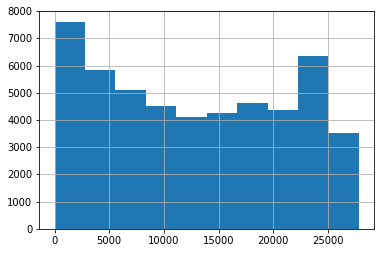

In [120]:
tme.block_code.hist()
plt.show()

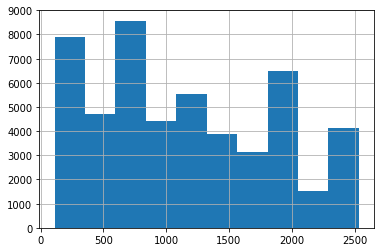

In [121]:
tme.beat.hist()
plt.show()

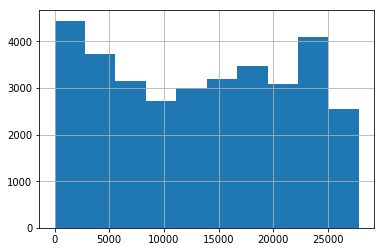

In [122]:
tme2.block_code.hist()
plt.show()

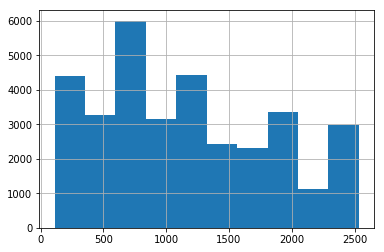

In [123]:
tme2.beat.hist()
plt.show()

# Answer for Question 2

So, for both types of crimes (60% and 40%) combined, the areas that have the highest amount of crimes are in block codes 0-5,000 and 22,500-25,000. The beats that the police should employ more forces in are in beats no. 0-250, 600-750, 1,100-1,250, 1,800-2,100 and 2,250-2,600.

And November-February has the highest amount of crimes in a year.

In [124]:
crime1_1.location.dtype

dtype('O')

In [125]:
crime1_1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,...,updated_on,block_code,crimetype_code,desc_code,dom,arr,datetime,year,month,day
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,...,2018-02-10 15:50:01+00:00,26499,27,42,0,0,2017-12-02 19:15:00+00:00,2017,12,2
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,...,2018-02-10 15:50:01+00:00,26516,27,42,0,0,2017-07-08 22:00:00+00:00,2017,7,8
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,...,2018-02-10 15:50:01+00:00,26383,27,42,0,0,2017-06-22 21:00:00+00:00,2017,6,22
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,...,2018-02-10 15:50:01+00:00,26549,27,42,0,0,2017-09-30 09:00:00+00:00,2017,9,30
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,...,2018-02-10 15:50:01+00:00,1232,27,42,0,0,2017-10-01 22:15:00+00:00,2017,10,1


In [129]:
loc1 = crime1_1['location'].copy()
loc1 = loc1.str.replace('(','')
loc1 = loc1.str.replace(')','')
loc1

0         41.702721948, -87.619668625
1         41.702992124, -87.626974971
2         41.706936355, -87.623514952
3         41.703132357, -87.612435302
4         41.700713642, -87.629098154
5           41.7030247, -87.620694297
6         41.700708236, -87.629559608
7         41.704421486, -87.624231083
8         41.706663944, -87.620295213
9         41.706951365, -87.603998844
84        41.707519433, -87.601839023
85        41.705934685, -87.620413136
86        41.702760615, -87.614863683
87        41.706614318, -87.614970928
88         41.70305791, -87.618529692
89        41.702975563, -87.618526942
90        41.706709388, -87.611311331
91        41.707139627, -87.625325518
92        41.702599552, -87.623390538
93        41.706653929, -87.612531464
94        41.700408322, -87.624520518
95        41.706429418, -87.611303477
96        41.704693299, -87.605811462
97        41.704641408, -87.613696512
98        41.705300305, -87.626561522
99        41.706239642, -87.624460132
100       41

In [134]:
crime1_1=crime1_1.drop(columns='location')
crime1_1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,domestic,community_area,updated_on,block_code,crimetype_code,desc_code,dom,arr,datetime,year,month,day
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,False,49,2018-02-10 15:50:01+00:00,26499,27,42,0,0,2017-12-02 19:15:00+00:00,2017,12,2
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,False,49,2018-02-10 15:50:01+00:00,26516,27,42,0,0,2017-07-08 22:00:00+00:00,2017,7,8
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,False,49,2018-02-10 15:50:01+00:00,26383,27,42,0,0,2017-06-22 21:00:00+00:00,2017,6,22
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,False,49,2018-02-10 15:50:01+00:00,26549,27,42,0,0,2017-09-30 09:00:00+00:00,2017,9,30
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,False,49,2018-02-10 15:50:01+00:00,1232,27,42,0,0,2017-10-01 22:15:00+00:00,2017,10,1


In [135]:
crime1_1['location']=loc1[0]
crime1_1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,domestic,community_area,...,block_code,crimetype_code,desc_code,dom,arr,datetime,year,month,day,location
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,False,49,...,26499,27,42,0,0,2017-12-02 19:15:00+00:00,2017,12,2,"41.702721948, -87.619668625"
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,False,49,...,26516,27,42,0,0,2017-07-08 22:00:00+00:00,2017,7,8,"41.702721948, -87.619668625"
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,False,49,...,26383,27,42,0,0,2017-06-22 21:00:00+00:00,2017,6,22,"41.702721948, -87.619668625"
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,False,49,...,26549,27,42,0,0,2017-09-30 09:00:00+00:00,2017,9,30,"41.702721948, -87.619668625"
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,False,49,...,1232,27,42,0,0,2017-10-01 22:15:00+00:00,2017,10,1,"41.702721948, -87.619668625"


In [137]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in crime1_1['location']:
    # Try to,
    try:
        # Split the row by comma, convert to float, and append
        # everything before the comma to lat
        lat.append(float(row.split(',')[0]))
        # Split the row by comma, convert to float, and append
        # everything after the comma to lon
        lon.append(float(row.split(',')[1]))
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
crime1_1['latitude'] = lat
crime1_1['longitude'] = lon
crime1_1.head()

,date,block,primary_type,description,location_description,beat,district,arrest,domestic,community_area,...,desc_code,dom,arr,datetime,year,month,day,location,latitude,longitude
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,False,49,...,42,0,0,2017-12-02 19:15:00+00:00,2017,12,2,"41.702721948, -87.619668625",41.702722,-87.619669
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,False,49,...,42,0,0,2017-07-08 22:00:00+00:00,2017,7,8,"41.702721948, -87.619668625",41.702722,-87.619669
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,False,49,...,42,0,0,2017-06-22 21:00:00+00:00,2017,6,22,"41.702721948, -87.619668625",41.702722,-87.619669
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,False,49,...,42,0,0,2017-09-30 09:00:00+00:00,2017,9,30,"41.702721948, -87.619668625",41.702722,-87.619669
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,False,49,...,42,0,0,2017-10-01 22:15:00+00:00,2017,10,1,"41.702721948, -87.619668625",41.702722,-87.619669


In [ ]:
sb.catplot(x="latitude", y="longitude", kind="swarm", data=crime1_1)
plt.show()

In [145]:
crime1_1.longitude.dtype

dtype('float64')